<h1 style="text-align: center">SALES FORECASTING FOR RETAIL BUSINESS</h1>

## Library Imports and Style Configuration

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import catppuccin
import matplotlib as mpl
mpl.style.use(catppuccin.PALETTE.mocha.identifier)

## Load Dataset

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding="unicode_escape")
df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


## Exploratory Data Analysis

In [3]:
df.shape

(2823, 25)

In [4]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

### Renaming Column Names

In [8]:
df.rename(columns={
    'ORDERNUMBER': 'order_number',
    'QUANTITYORDERED': 'quantity_ordered',
    'PRICEEACH': 'price_each',
    'ORDERLINENUMBER': 'order_line_number',
    'SALES': 'sales',
    'ORDERDATE': 'order_date',
    'STATUS': 'status',
    'QTR_ID': 'quarter_id',
    'MONTH_ID': 'month_id',
    'YEAR_ID': 'year_id',
    'PRODUCTLINE': 'product_line',
    'MSRP': 'msrp',
    'PRODUCTCODE': 'product_code',
    'CUSTOMERNAME': 'customer_name',
    'PHONE': 'phone',
    'ADDRESSLINE1': 'address_line1',
    'ADDRESSLINE2': 'address_line2',
    'CITY': 'city',
    'STATE': 'state',
    'POSTALCODE': 'postal_code',
    'COUNTRY': 'country',
    'TERRITORY': 'territory',
    'CONTACTLASTNAME': 'contact_last_name',
    'CONTACTFIRSTNAME': 'contact_first_name',
    'DEALSIZE': 'deal_size'
}, inplace=True)

### Convert 'Order Date' column to datetime format

In [9]:
df["order_date"] = pd.to_datetime(df["order_date"])

### Set 'Order Date' as the index and sort the DataFrame in ascending chronological order

In [10]:
df.set_index('order_date', inplace=True)
df.sort_index(axis=0, ascending=True, inplace=True)

### Remove columns with significant missing data

In [11]:
df.drop(["address_line2", "state", "postal_code", "territory"], axis=1, inplace=True)

In [12]:
df.head(2)

,order_number,quantity_ordered,price_each,order_line_number,sales,status,quarter_id,month_id,year_id,product_line,msrp,product_code,customer_name,phone,address_line1,city,country,contact_last_name,contact_first_name,deal_size
order_date,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.0,3,5151.0,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,50,67.8,2,3390.0,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium


In [13]:
df.product_line.unique()

array(['Vintage Cars', 'Trucks and Buses', 'Classic Cars', 'Trains',
       'Ships', 'Planes', 'Motorcycles'], dtype=object)

In [14]:
df.status.unique()

array(['Shipped', 'Resolved', 'Cancelled', 'On Hold', 'Disputed',
       'In Process'], dtype=object)

## Monthly Sales Over Time

In [15]:
montly_sale = df.groupby(pd.Grouper(freq="ME"))["sales"].sum()

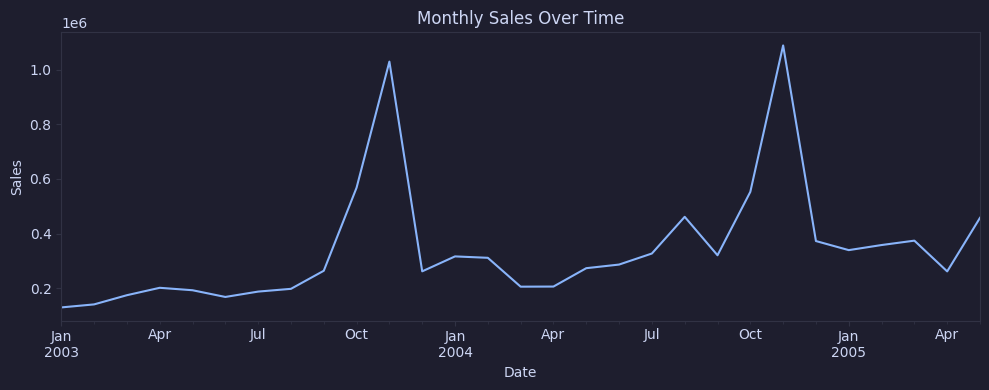

In [16]:
plt.figure(figsize=(10,4))
montly_sale.plot(title='Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('images/Monthly Sales.png')
plt.show()

## Seasonal Decomposition

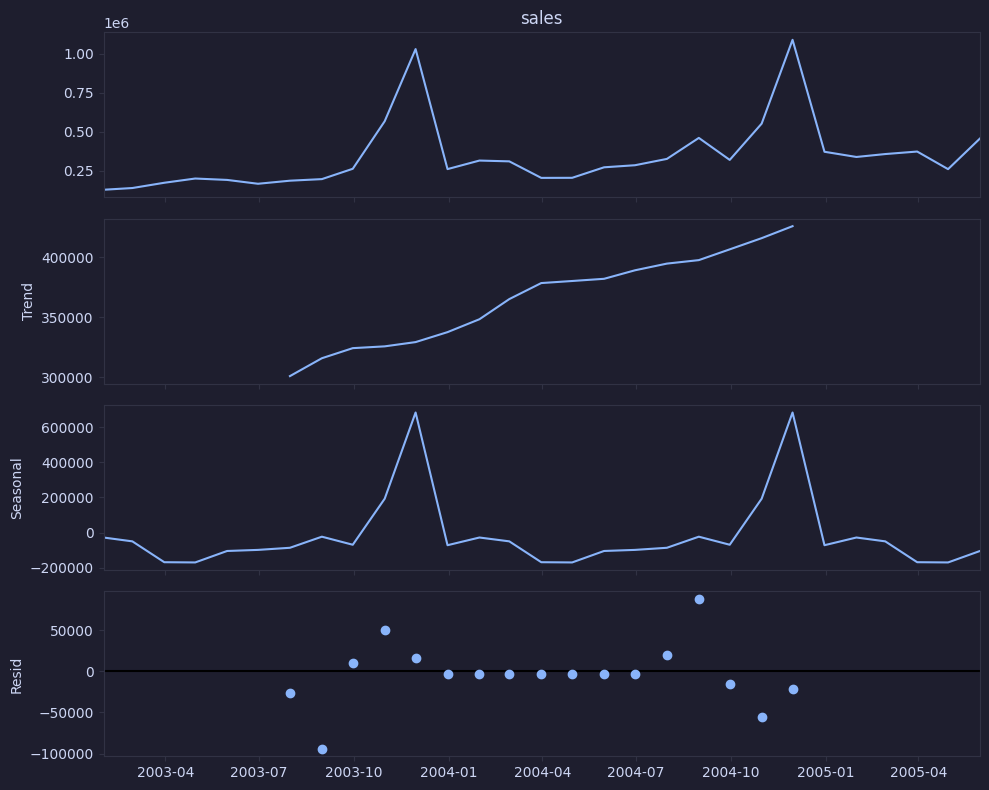

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(montly_sale, model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.savefig("images/Seasonal Decomposition.png")
plt.show()

## ML Model

In [18]:
# Train/Test Split
# Hold out the last 12 months for testing
train_sales = montly_sale.iloc[:-12]
test_sales  = montly_sale.iloc[-12:]

print("Train shape:", train_sales.shape)
print("Test shape: ", test_sales.shape)

Train shape: (17,)
Test shape:  (12,)


In [19]:
# Fit a SARIMAX Forecasting Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
model   = SARIMAX(train_sales,
                  order=(1,1,1),
                  seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Print a brief summary
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2772      5.961     -0.047      0.963     -11.961      11.407
ma.L1          0.7860      9.524      0.083      0.934     -17.881      19.453
ar.S.L12      -0.9720   1884.866     -0.001      1.000   -3695.240    3693.297
ma.S.L12    3.306e-05   3.41e+04   9.69e-10      1.000   -6.69e+04    6.69e+04
sigma2      5.849e+09      0.113   5.17e+10      0.000    5.85e+09    5.85e+09


In [20]:
# Generate Forecast & Confidence Intervals
forecast = results.get_forecast(steps=len(test_sales))
pred     = forecast.predicted_mean
conf_df  = forecast.conf_int()

# Peek at forecast vs CI
pd.concat([pred.rename('Forecast'),
           conf_df.iloc[:,0].rename('Lower CI'),
           conf_df.iloc[:,1].rename('Upper CI')],
          axis=1).head()

,Forecast,Lower CI,Upper CI
2004-06-30,291078.165036,140097.826735,442058.503338
2004-07-31,286549.526517,14902.054202,558196.998832
2004-08-31,288237.425193,-52154.400151,628629.250537
2004-09-30,289704.707941,-110706.707584,690116.123467
2004-10-31,298332.974212,-153467.245928,750133.194351


## Forecast vs Actual

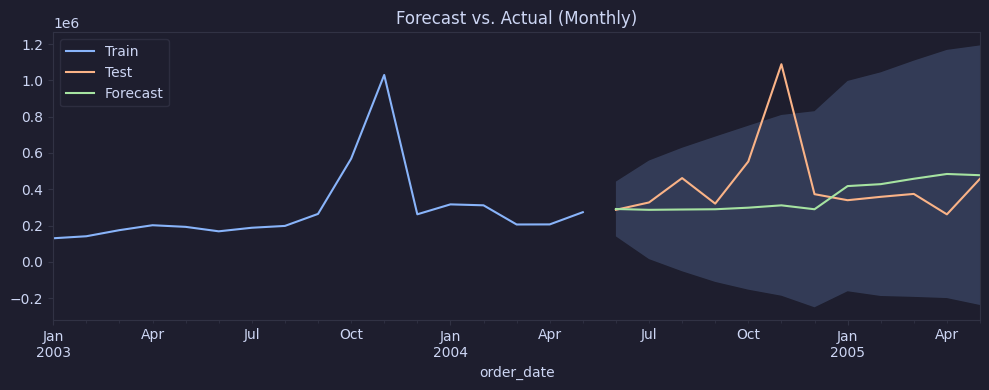

In [21]:
# Plot Forecast vs Actual
plt.figure(figsize=(10,4))
train_sales.plot(label='Train')
test_sales.plot(label='Test')
pred.plot(label='Forecast')
plt.fill_between(test_sales.index,
                 conf_df.iloc[:,0].astype(float),
                 conf_df.iloc[:,1].astype(float),
                 alpha=0.2)
plt.legend()
plt.title('Forecast vs. Actual (Monthly)')
plt.tight_layout()
plt.savefig("images/Montly Sales Forecast.png")
plt.show()

## Forecast Accuracy Metrics

In [22]:
# Compute Accuracy Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae  = mean_absolute_error(test_sales, pred)
rmse = np.sqrt(mean_squared_error(test_sales, pred))
mape = np.mean(np.abs((test_sales - pred) / test_sales)) * 100

metrics = pd.DataFrame({
    'MAE': [mae],
    'RMSE': [rmse],
    'MAPE': [mape]
})
metrics

,MAE,RMSE,MAPE
0,153160.539169,254484.065691,29.578657


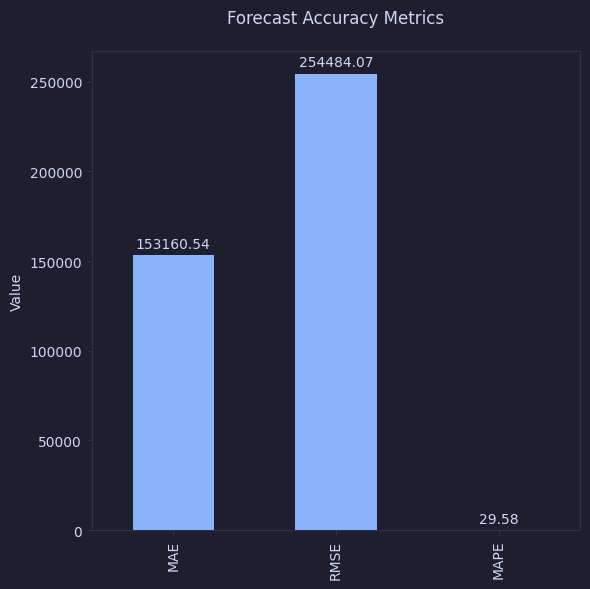

In [23]:
import matplotlib.pyplot as plt

# Bar Chart of Accuracy Metrics with Labels
plt.figure(figsize=(6, 6))
ax = metrics.iloc[0].plot(kind='bar')

plt.title('Forecast Accuracy Metrics', pad=20)
plt.ylabel('Value')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig("images/Forecast Accuracy Metrics.png")
plt.show()

## Forecast Accuracy by Model

                                    MAE           RMSE       MAPE
Model                                                            
AR(1)                     153649.773478  259878.693020  26.647702
MA(1)                     152994.474821  259808.877488  26.431895
ARMA(1,1)                 152994.509205  259804.139295  26.433038
ARIMA(1,1,1)              146419.375380  254658.796767  24.958941
SARIMA(1,1,1)x(1,1,1,12)  153160.539169  254484.065691  29.578657



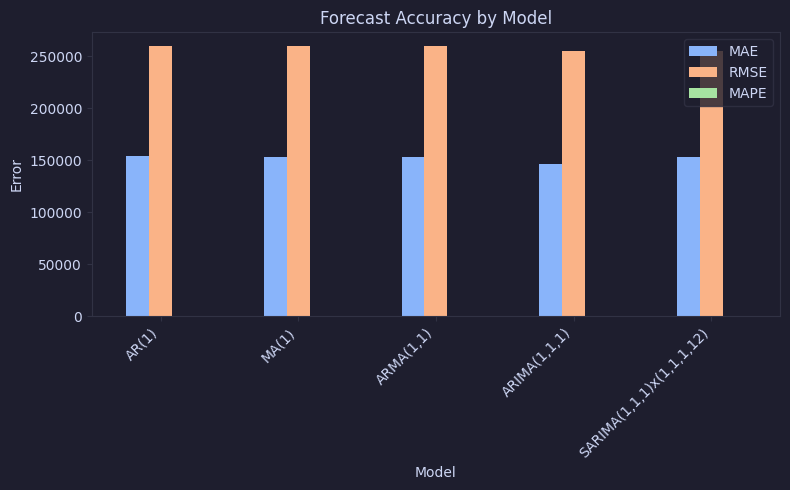


                                    MAE           RMSE       MAPE
Model                                                            
AR(1)                     153649.773478  259878.693020  26.647702
MA(1)                     152994.474821  259808.877488  26.431895
ARMA(1,1)                 152994.509205  259804.139295  26.433038
ARIMA(1,1,1)              146419.375380  254658.796767  24.958941
SARIMA(1,1,1)x(1,1,1,12)  153160.539169  254484.065691  29.578657



In [24]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define & fit models (no disp arg)
models = {
    'AR(1)':        ARIMA(train_sales, order=(1,0,0)).fit(),
    'MA(1)':        ARIMA(train_sales, order=(0,0,1)).fit(),
    'ARMA(1,1)':    ARIMA(train_sales, order=(1,0,1)).fit(),
    'ARIMA(1,1,1)': ARIMA(train_sales, order=(1,1,1)).fit(),
    'SARIMA(1,1,1)x(1,1,1,12)': SARIMAX(
        train_sales,
        order=(1,1,1),
        seasonal_order=(1,1,1,12)
    ).fit()
}

# Forecast with each
results = {}
for name, fitted in models.items():
    if 'SARIMA' in name:
        pred = fitted.get_forecast(steps=len(test_sales)).predicted_mean
    else:
        pred = fitted.forecast(steps=len(test_sales))
        pred.index = test_sales.index  # align index
    results[name] = pred

# Compute accuracy metrics
metrics = []
for name, pred in results.items():
    mae  = mean_absolute_error(test_sales, pred)
    rmse = np.sqrt(mean_squared_error(test_sales, pred))
    mape = np.mean(np.abs((test_sales - pred) / test_sales)) * 100
    metrics.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    })

metrics_df = pd.DataFrame(metrics).set_index('Model')
print(metrics_df)
print()
# Visual comparison
metrics_df.plot(kind='bar', figsize=(8,5), title='Forecast Accuracy by Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/Forecast Accuracy by Model.png")
plt.show()
print()
print(metrics_df)
print()